# Image Forensic Localization

In [0]:
# Download Data

#!wget --header="Host: uccb7c55f8c780cb4135c0e9af82.dl.dropboxusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.dropbox.com/" "https://uccb7c55f8c780cb4135c0e9af82.dl.dropboxusercontent.com/cd/0/get/ApWvC8xO6eFpqm96OjQOtubLFyN-6JLpRmGBAGDlUYQKuFCh3v66ObS6fok_ek59M9cDYA2aO0CbtqeNrEWGAFg8Wt1AH6Z6LQRTU53pcSaHBQ/file?_download_id=8477232177633631706739485635867118070152572682347424645594964017&_notify_domain=www.dropbox.com&dl=1" -O "phase-01-training.tar.gz" -c

--2019-09-27 08:21:25--  https://uccb7c55f8c780cb4135c0e9af82.dl.dropboxusercontent.com/cd/0/get/ApWvC8xO6eFpqm96OjQOtubLFyN-6JLpRmGBAGDlUYQKuFCh3v66ObS6fok_ek59M9cDYA2aO0CbtqeNrEWGAFg8Wt1AH6Z6LQRTU53pcSaHBQ/file?_download_id=8477232177633631706739485635867118070152572682347424645594964017&_notify_domain=www.dropbox.com&dl=1
Resolving uccb7c55f8c780cb4135c0e9af82.dl.dropboxusercontent.com (uccb7c55f8c780cb4135c0e9af82.dl.dropboxusercontent.com)... 162.125.9.6, 2620:100:601f:6::a27d:906
Connecting to uccb7c55f8c780cb4135c0e9af82.dl.dropboxusercontent.com (uccb7c55f8c780cb4135c0e9af82.dl.dropboxusercontent.com)|162.125.9.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2749754446 (2.6G) [application/binary]
Saving to: ‘phase-01-training.tar.gz’

phase-01-training.t 100%[===================>]   2.56G  46.0MB/s    in 55s     

2019-09-27 08:22:22 (47.3 MB/s) - ‘phase-01-training.tar.gz’ saved [2749754446/2749754446]



In [0]:
# import tarfile
# tar = tarfile.open("/content/drive/My Drive/COLAB FILES/Image Forensics/phase-01-training.tar.gz")
# tar.extractall()
# tar.close()


# shutil.rmtree("/content/dataset-dist/phase-01/training/aug_data_512")

In [0]:
# root_path = '/content/drive/My Drive/COLAB FILES/Image Forensics'  #change dir to your project folder
# import os
# os.chdir(root_path)
# !ls

dataset-dist  phase-01-training.tar.gz	Task_2-Copy2.ipynb


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# https://github.com/qubvel/segmentation_models

# Segmentation models is python library with Neural Networks for Image Segmentation based on Keras and Tensorflow Keras frameworks.

!pip install segmentation-models

In [3]:
# Import Libraries 

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import PIL
import numpy as np
import pandas as pd
import os
import tarfile
from PIL import Image
import matplotlib
from tqdm import tqdm_notebook, tnrange
from PIL import Image, ImageChops, ImageEnhance

from skimage.io import imread
from skimage import exposure, color
from skimage.transform import resize
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from itertools import chain
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers.merge import concatenate, add
from keras.optimizers import Adam,SGD
from keras import optimizers
from tensorboardcolab import TensorBoardColab,TensorBoardColabCallback
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import load_model

from segmentation_models import Unet
from segmentation_models.backbones import get_preprocessing
# segmentation_models could also use `tf.keras` if you do not have Keras installed
# or you could switch to other framework using `sm.set_framework('tf.keras')`

from tqdm import tqdm
import cv2
import shutil

# https://github.com/albu/albumentations

from albumentations import (
    IAAPerspective, ShiftScaleRotate, CLAHE, 
     ShiftScaleRotate, Blur,   HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
	PadIfNeeded,HorizontalFlip,VerticalFlip, CenterCrop, Crop, Compose, Transpose, RandomRotate90, ElasticTransform, 
    GridDistortion, OpticalDistortion, RandomSizedCrop, OneOf, CLAHE, RandomBrightnessContrast, RandomGamma, ChannelShuffle,
    IAASharpen, IAAEmboss, RandomContrast, RandomBrightness, Flip, OneOf, Compose, RandomGamma, RGBShift, Rotate
)

Using TensorFlow backend.


In [0]:
# We have seperated forged images and its corresponding mask images.

pristine_dir='/content/drive/My Drive/COLAB FILES/Image Forensics/dataset-dist/phase-01/training/pristine/'
fake_dir='/content/drive/My Drive/COLAB FILES/Image Forensics/dataset-dist/phase-01/training/fake/'
#mask_dir='C:/Users/Administrator/Documents/Datasets/Image Forensic Challenge/phase-01-training_1/dataset-dist/phase-01/training/maskfiles/'
path ='/content/drive/My Drive/COLAB FILES/Image Forensics/dataset-dist/phase-01/training/'

len(os.listdir(pristine_dir)),len(os.listdir(fake_dir))

(1050, 900)

In [0]:
fake_images=list(os.listdir(fake_dir))
fake_image_ids=list(set([val[:32] for val in fake_images]))
len(fake_image_ids)

# fake_image_ids[0] - 'e3f10dc9b7dfcf91efd0bce8bf2c82b0'

450

In [0]:
pristine_imageIDs=[]
for file in os.listdir(pristine_dir):
    pristine_imageIDs.append(file)
pristine_imageIDs=[val[0:32] for val in pristine_imageIDs]

fake_imageIDs=[]
for file in os.listdir(fake_dir):
    fake_imageIDs.append(file)
fake_imageIDs=list(set([val[0:32] for val in fake_imageIDs]))

In [0]:
def mask_prestine(path):
    img = Image.open(path).convert("RGB")
    img_shape=(np.array(img)).shape
    return np.ones((img_shape))*255

def plot_Mask(image_id,fake=True):
    if fake:
        PATH='/content/drive/My Drive/COLAB FILES/Image Forensics/dataset-dist/phase-01/training/fake/'+image_id+'.png'
    else:
        PATH='/content/drive/My Drive/COLAB FILES/Image Forensics/dataset-dist/phase-01/training/pristine/'+image_id+'.png'

    PATH_mask=PATH[:-3]+'mask.png'
    img = Image.open(PATH).convert("RGB")
    try:
        mask_img=Image.open(PATH_mask).convert("RGB")
    except:
        mask_img=mask_prestine(PATH)
    fig = plt.figure(figsize=(15,10))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax1.set_title("Image")
    ax2.set_title("Mask")
    ax1.imshow(img)
    ax2.imshow(mask_img)
    print("image {0} has a shape of {1}".format(image_id,np.array(img).shape))
    print("image {0} has a shape of {1}".format(image_id,np.array(mask_img).shape))
    print("*"*60)

image d6388ee9f63e1111d41ce66ddf06ff41 has a shape of (3240, 4320, 3)
image d6388ee9f63e1111d41ce66ddf06ff41 has a shape of (3240, 4320, 3)
************************************************************


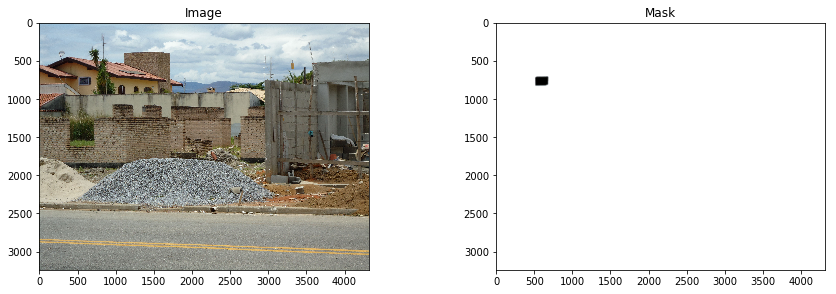

In [0]:
plot_Mask(fake_imageIDs[153])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image 4bc6326fedd3e7cea3abf418c225d5df has a shape of (575, 1024, 3)
image 4bc6326fedd3e7cea3abf418c225d5df has a shape of (575, 1024, 3)
************************************************************


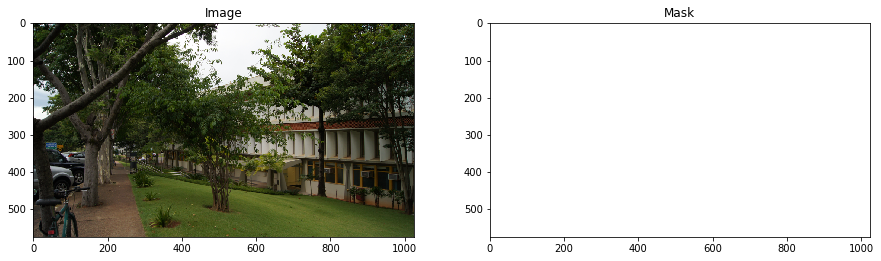

In [0]:
plot_Mask(pristine_imageIDs[153],fake=False)

### Processed Fake Images

In [0]:
%%time
if not os.path.exists(path+"total_images_512"):
    os.makedirs(path+"total_images_512/masks")
    os.makedirs(path+"total_images_512/images")
    for i,val in enumerate(fake_imageIDs):
        actual_image=fake_dir+val+".png"
        img=Image.open(actual_image).convert("RGB")
        image_id="image{}.png".format(i)
        height = 512
        width = 512
        img = img.resize((height, width), PIL.Image.ANTIALIAS)
        img.save(path+"total_images_512/images/"+image_id)
        #PATH_mask=PATH[:-3]+'mask.png'
        mask_image=val+".mask.png"
        mask=Image.open(fake_dir+mask_image).convert("RGB")
        #hpercent = (baseheight / float(mask.size[1]))
        #wsize = int((float(mask.size[0]) * float(hpercent)))
        mask = mask.resize((height, width), PIL.Image.ANTIALIAS)
        mask_id="mask{}.png".format(i)
        mask.save(path+"total_images_512/masks/"+mask_id)
    print("Done Resizing for fake images and masks")  
else:
    print("Directories are already present in the path")

Directories are already present in the path
CPU times: user 956 µs, sys: 334 µs, total: 1.29 ms
Wall time: 3.09 ms


### Processed Pristine Images

In [0]:
%%time
for i,val in enumerate(pristine_imageIDs):
    actual_image=pristine_dir+val+".png"
    img=Image.open(actual_image).convert("RGB")
    image_id="image{}.png".format(450+i)
    height = 512
    width = 512
    img = img.resize((height, width), PIL.Image.ANTIALIAS)
    img.save(path+"total_images_512/images/"+image_id)
print("Done Resizing for pristine") 


Done Resizing for pristine
CPU times: user 2min 44s, sys: 1.78 s, total: 2min 46s
Wall time: 9min 14s


In [0]:
images_path='/content/drive/My Drive/COLAB FILES/Image Forensics/dataset-dist/phase-01/training/total_images_512/images/'
masks_path='/content/drive/My Drive/COLAB FILES/Image Forensics/dataset-dist/phase-01/training/total_images_512/masks/'
path ='/content/drive/My Drive/COLAB FILES/Image Forensics/dataset-dist/phase-01/training/'

len(os.listdir(images_path)),len(os.listdir(masks_path))

(1500, 450)

# Data Augmentation 

**About Albumentation Library**

1. The library is faster than other libraries on most of the transformations.

2. Based on numpy, OpenCV, imgaug picking the best from each of them.

3. Simple, flexible API that allows the library to be used in any computer vision pipeline.

4. Large, diverse set of transformations.

5. Written by Kaggle Masters.

In [0]:
# https://www.kaggle.com/alexanderliao/image-augmentation-demo-with-albumentation

# Data augmentation is a powerful technique to increase the amount of your data and prevent model overfitting.
# Since our dataset is very small we will apply a large number of different augmentations

# sample images to check output

image=cv2.imread(images_path+'image55.png')
mask=cv2.imread(masks_path+'mask55.png')

def visualize(image, mask, true_image, true_mask):
    fontsize = 12
    f, ax = plt.subplots(1, 4, figsize=(18, 18))
    ax[0].imshow(true_image)
    ax[0].set_title('Original image', fontsize=fontsize)
    ax[1].imshow(image)
    ax[1].set_title('Transformed image', fontsize=fontsize)
    ax[2].imshow(true_mask)
    ax[2].set_title('Original mask', fontsize=fontsize)
    ax[3].imshow(mask)
    ax[3].set_title('Transformed mask', fontsize=fontsize)

(512, 512, 3) (512, 512, 3)


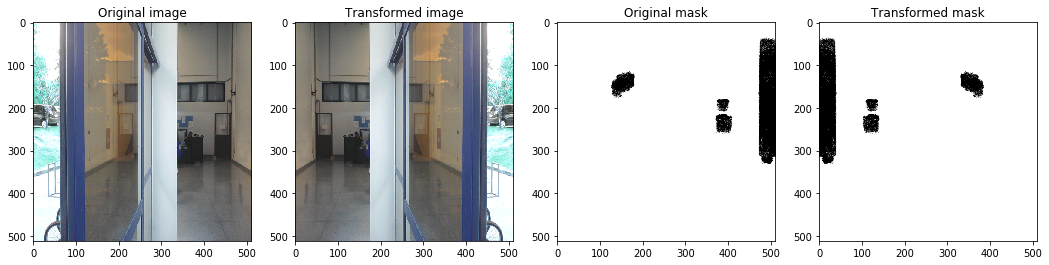

In [0]:
aug = HorizontalFlip(p=1)
augmented = aug(image=image, mask=mask)
image_hflip = augmented['image']
mask_hflip = augmented['mask']
print(image_hflip.shape, mask_hflip.shape)
visualize(image_hflip, mask_hflip, true_image=image, true_mask=mask)

(512, 512, 3) (512, 512, 3)


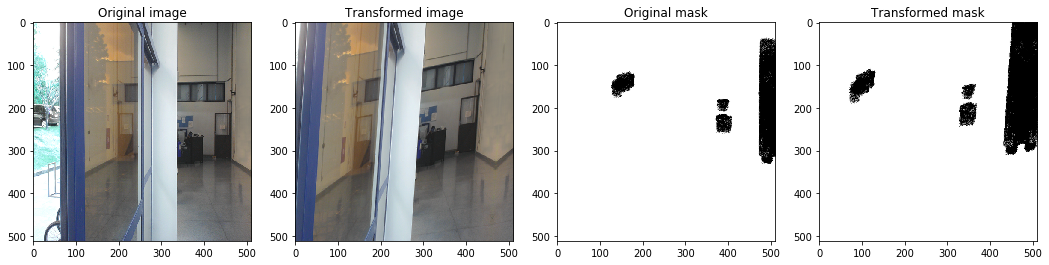

In [0]:
aug = ElasticTransform(p=1,border_mode=cv2.BORDER_REFLECT_101,alpha_affine=80)
augmented = aug(image=image, mask=mask)
image_et = augmented['image']
mask_et = augmented['mask']
print(image_et.shape, mask_et.shape)
visualize(image_et, mask_et, true_image=image, true_mask=mask)

(512, 512, 3) (512, 512, 3)


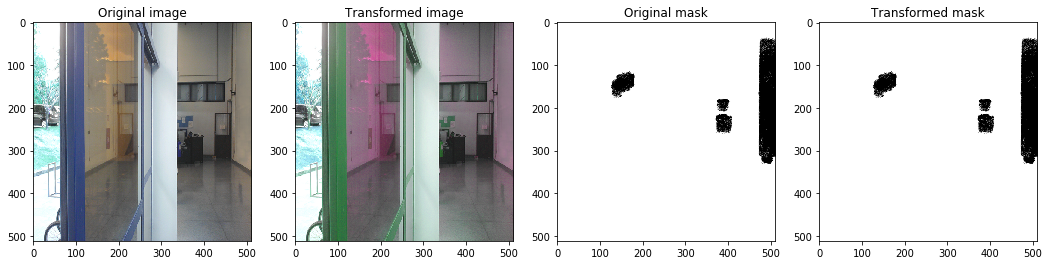

In [0]:
aug = ChannelShuffle(p=1)
augmented = aug(image=image, mask=mask)
image_cs = augmented['image']
mask_cs = augmented['mask']
print(image_cs.shape, mask_cs.shape)
visualize(image_cs, mask_cs, true_image=image, true_mask=mask)

(512, 512, 3) (512, 512, 3)


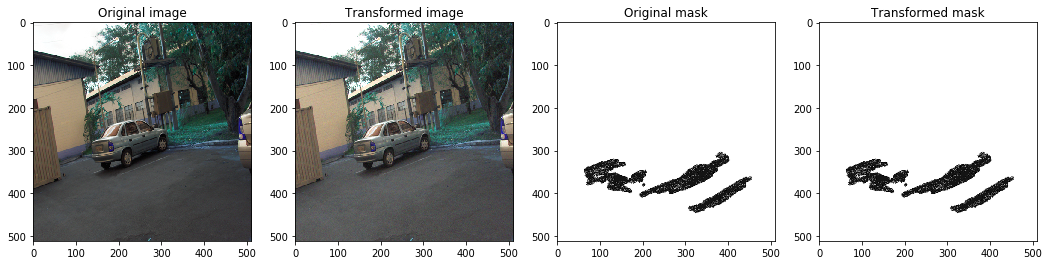

In [0]:
# Composition of augmentations: 

def strong_aug(p=1):
    return Compose([
        RandomRotate90(),
        #Flip(),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=.2),
            MedianBlur(blur_limit=3, p=.1),
            Blur(blur_limit=3, p=.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=.2),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomContrast(),
            RandomBrightness(),
        ], p=0.3),
        #HueSaturationValue(p=0.3),
    ], p=p)

aug = strong_aug(p=1)
augmented = aug(image=image, mask=mask)
image_strong = augmented['image']
mask_strong = augmented['mask']
print(image_strong.shape, mask_strong.shape)
visualize(image_strong, mask_strong, true_image=image, true_mask=mask)

In [0]:
def horizontalFlip(image,mask):
    aug = HorizontalFlip(p=1)
    augmented = aug(image=image, mask=mask)
    image_hflip = augmented['image']
    mask_hflip = augmented['mask']
    return image_hflip,mask_hflip

def verticalFlip(image,mask):
    aug = VerticalFlip(p=1)
    augmented = aug(image=image, mask=mask)
    image_vflip = augmented['image']
    mask_vflip = augmented['mask']
    return image_vflip,mask_vflip
    
def randomRotate(image,mask):
    aug = RandomRotate90(p=1)
    augmented = aug(image=image, mask=mask)
    image_rot90 = augmented['image']
    mask_rot90 = augmented['mask']
    return image_rot90,mask_rot90
    
def transpose(image,mask):
    aug = Transpose(p=1)
    augmented = aug(image=image, mask=mask)
    image_transpose = augmented['image']
    mask_transpose = augmented['mask']
    return image_transpose,mask_transpose

def elasticDistortion(image,mask):
    aug = ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03)
    augmented = aug(image=image, mask=mask)
    image_ed = augmented['image']
    mask_ed = augmented['mask']
    return image_ed,mask_ed

def opticalDistortion(image,mask):
    aug = OpticalDistortion(p=1, distort_limit=2, shift_limit=0.5)
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od

def strong_Aug(image,mask):
    aug = strong_aug(p=1)
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od

def channelShuffle(image,mask):
    aug = ChannelShuffle(p=1)
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od

def RandomBrightness(image,mask):
    aug = RandomBrightness(limit=1.2, p=0.5)
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od

def Rotate(image,mask):
    aug = Rotate(limit=286, p=0.5)
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od
  
def RGBShift(image,mask):
    aug = RGBShift(r_shift_limit=105, g_shift_limit=45, b_shift_limit=40, p=0.5)
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od

def RandomGamma(image,mask):
    aug = RandomGamma(gamma_limit=37, p=0.5)
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od

def Flip(image,mask):
    aug = Flip(p=0.5)
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od

def CenterCrop(image,mask):
    aug = CenterCrop(height=288, width=288, p=0.5)
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od

def HueSaturationValue(image,mask):
    aug = HueSaturationValue(hue_shift_limit=172, sat_shift_limit=20, val_shift_limit=27, p=0.5)
    augmented = aug(image=image, mask=mask)
    image_od = augmented['image']
    mask_od = augmented['mask']
    return image_od,mask_od



In [0]:
%%time
if not os.path.isfile(path+"aug_data_512"):
    os.makedirs(path+"aug_data_512/images")
    os.makedirs(path+"aug_data_512/masks")
w=0
for i in range(len(os.listdir(path+"total_images_512/images"))):
    if i<450:
        image=cv2.imread(path+'total_images_512/images/image{}.png'.format(i))
        mask=cv2.imread(path+'total_images_512/masks/mask{}.png'.format(i))

        actual_image=image.copy()
        actual_mask=mask.copy()
        img_o=Image.fromarray(actual_image)
        mskh_o=Image.fromarray(actual_mask)
        img_o.save(path+'aug_data_512/images/image{}.png'.format(w))
        mskh_o.save(path+'aug_data_512/masks/mask{}.png'.format(w))

        h=horizontalFlip(image,mask)
        imgh=Image.fromarray(h[0])
        mskh=Image.fromarray(h[1])
        imgh.save(path+'aug_data_512/images/image{}.png'.format(w+1))
        mskh.save(path+'aug_data_512/masks/mask{}.png'.format(w+1))
        
        v=verticalFlip(image,mask)
        imgv=Image.fromarray(v[0])
        mskv=Image.fromarray(v[1])
        imgv.save(path+'aug_data_512/images/image{}.png'.format(w+2))
        mskv.save(path+'aug_data_512/masks/mask{}.png'.format(w+2))
        
        t=transpose(image,mask)
        imgt=Image.fromarray(t[0])
        mskt=Image.fromarray(t[1])
        imgt.save(path+'aug_data_512/images/image{}.png'.format(w+3))
        mskt.save(path+'aug_data_512/masks/mask{}.png'.format(w+3))
        
        r=randomRotate(image,mask)
        imgr=Image.fromarray(r[0])
        mskr=im=Image.fromarray(r[1])
        imgr.save(path+'aug_data_512/images/image{}.png'.format(w+4))
        mskr.save(path+'aug_data_512/masks/mask{}.png'.format(w+4))
        
        o=opticalDistortion(image,mask)
        imgo=Image.fromarray(o[0])
        msko=Image.fromarray(o[1])
        imgo.save(path+'aug_data_512/images/image{}.png'.format(w+5))
        msko.save(path+'aug_data_512/masks/mask{}.png'.format(w+5))
        
        e=elasticDistortion(image,mask)
        imge=Image.fromarray(e[0])
        mske=Image.fromarray(e[1])
        imge.save(path+'aug_data_512/images/image{}.png'.format(w+6))
        mske.save(path+'aug_data_512/masks/mask{}.png'.format(w+6))
        
        s=strong_Aug(image,mask)
        imge=Image.fromarray(s[0])
        mske=Image.fromarray(s[1])
        imge.save(path+'aug_data_512/images/image{}.png'.format(w+7))
        mske.save(path+'aug_data_512/masks/mask{}.png'.format(w+7))
        
        ch=channelShuffle(image,mask)
        imge=Image.fromarray(ch[0])
        mske=Image.fromarray(ch[1])
        imge.save(path+'aug_data_512/images/image{}.png'.format(w+8))
        mske.save(path+'aug_data_512/masks/mask{}.png'.format(w+8))

        #rb=RandomBrightness(image,mask)
        #imge=Image.fromarray(rb[0])
        #mske=Image.fromarray(rb[1])
        #imge.save(path+'aug_data_512/images/image{}.png'.format(w+9))
        #mske.save(path+'aug_data_512/masks/mask{}.png'.format(w+9))

        #r=Rotate(image,mask)
        #imge=Image.fromarray(r[0])
        #mske=Image.fromarray(r[1])
        #imge.save(path+'aug_data_512/images/image{}.png'.format(w+9))
        #mske.save(path+'aug_data_512/masks/mask{}.png'.format(w+9))
#
        #rgb=RGBShift(image,mask)
        #imge=Image.fromarray(rgb[0])
        #mske=Image.fromarray(rgb[1])
        #imge.save(path+'aug_data_512/images/image{}.png'.format(w+10))
        #mske.save(path+'aug_data_512/masks/mask{}.png'.format(w+10))
#
        #rg=RandomGamma(image,mask)
        #imge=Image.fromarray(rg[0])
        #mske=Image.fromarray(rg[1])
        #imge.save(path+'aug_data_512/images/image{}.png'.format(w+11))
        #mske.save(path+'aug_data_512/masks/mask{}.png'.format(w+11))
#
        #f=Flip(image,mask)
        #imge=Image.fromarray(f[0])
        #mske=Image.fromarray(f[1])
        #imge.save(path+'aug_data_512/images/image{}.png'.format(w+12))
        #mske.save(path+'aug_data_512/masks/mask{}.png'.format(w+12))
#
        #cc=CenterCrop(image,mask)
        #imge=Image.fromarray(cc[0])
        #mske=Image.fromarray(cc[1])
        #imge.save(path+'aug_data_512/images/image{}.png'.format(w+13))
        #mske.save(path+'aug_data_512/masks/mask{}.png'.format(w+13))
#
        #hs=HueSaturationValue(image,mask)
        #imge=Image.fromarray(hs[0])
        #mske=Image.fromarray(hs[1])
        #imge.save(path+'aug_data_512/images/image{}.png'.format(w+14))
        #mske.save(path+'aug_data_512/masks/mask{}.png'.format(w+14))

        w=w+9
    
    else:
        print("Completed...")
        break

Completed...
CPU times: user 10min 2s, sys: 31.6 s, total: 10min 33s
Wall time: 16min 16s


In [0]:
%%time
img=Image.open(path+'white_image.png') # manually downloaded
height = 512
width = 512
img = img.resize((height, width), PIL.Image.ANTIALIAS)
img.save(path+'white_img.png')

w=4050
for i in range(1050):
    image=cv2.imread(path+'total_images_512/images/image{}.png'.format(i+450))
   
    mask=cv2.imread(path+'white_img.png')
    img_o=Image.fromarray(image)
    mskh_o=Image.fromarray(mask)
    img_o.save(path+'aug_data_512/images/image{}.png'.format(w))
    mskh_o.save(path+'aug_data_512/masks/mask{}.png'.format(w))
    w=w+1
print("Done!")


Done!
CPU times: user 2min 22s, sys: 1.87 s, total: 2min 23s
Wall time: 2min 45s


In [0]:
images_aug_path=path+'aug_data_512/images/'
masks_aug_path=path+'aug_data_512/masks/'

len(os.listdir(images_aug_path)),len(os.listdir(masks_aug_path))

(5100, 5100)

In [0]:
'''images_aug_path='C:/Users/Administrator/Documents/Datasets/Image Forensic Challenge/phase-01-training_1/dataset-dist/phase-01/training/aug_data_512/images/'
masks_aug_path='C:/Users/Administrator/Documents/Datasets/Image Forensic Challenge/phase-01-training_1/dataset-dist/phase-01/training/aug_data_512/masks/'

len(os.listdir(images_aug_path)),len(os.listdir(masks_aug_path))'''

"images_aug_path='C:/Users/Administrator/Documents/Datasets/Image Forensic Challenge/phase-01-training_1/dataset-dist/phase-01/training/aug_data_512/images/'\nmasks_aug_path='C:/Users/Administrator/Documents/Datasets/Image Forensic Challenge/phase-01-training_1/dataset-dist/phase-01/training/aug_data_512/masks/'\n\nlen(os.listdir(images_aug_path)),len(os.listdir(masks_aug_path))"

# Error Level Analysis

In [0]:
%%time

# https://gist.github.com/ewencp/3356622
# https://forensics.map-base.info/report_2/index_en.shtml#b
# https://fotoforensics.com/tutorial-ela.php
# https://www.youtube.com/watch?v=G1Y0UTMTF7o&t=671s
# https://29a.ch/photo-forensics/#error-level-analysis  -  Tool to understand how it works

# Error Level Analysis (ELA) permits identifying areas within an image that are at different compression levels. With JPEG images, the entire picture should be at roughly the same level.
# If a section of the image is at a significantly different error level, then it likely indicates a digital modification.

''' Error level analysis (ELA) works by intentionally resaving the image at a known error rate, such as 95%, and then computing the difference between the images. 
    If there is virtually no change, then the cell has reached its local minima for error at that quality level. However, if there is a large amount of change, 
    then the pixels are not at their local minima and are effectively original.
              -Neal Krawetz, Ph.D. http://www.hackerfactor.com '''


if not os.path.exists(path+'aug_data_512/ELA_Images'):
    os.makedirs(path+'aug_data_512/ELA_Images')
    
    for file in (os.listdir(path+'aug_data_512/images')):
        filename = path+'aug_data_512/images/{}'.format(file)
        resaved = '.resaved.jpg'
        ela = path+'aug_data_512/ELA_Images/{}'.format(file)
        im = Image.open(filename).convert("RGB")
        im.save(resaved, 'JPEG', quality=95) # try different JPEG quality levels.
        resaved_im = Image.open(resaved)
        ela_im = ImageChops.difference(im, resaved_im)
        extrema = ela_im.getextrema()
        max_diff = max([ex[1] for ex in extrema])
        scale = 255.0/max_diff
        ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
        ela_im.save(ela)
    print("DONE Converting to ELA!")
else:
    print("Already Exists!")

DONE Converting to ELA!
CPU times: user 15min 48s, sys: 7.71 s, total: 15min 56s
Wall time: 32min 37s


In [0]:
path ='/content/drive/My Drive/COLAB FILES/Image Forensics/dataset-dist/phase-01/training/'
images_path = path+'aug_data_512/images/'
masks_path = path+'aug_data_512/masks/'
ela_path = path+'aug_data_512/ELA_Images/'


org_images = os.listdir(images_path)
mask_images = os.listdir(masks_path)
ela_images = os.listdir(ela_path)

len(os.listdir(images_path)),len(os.listdir(masks_path)),len(os.listdir(ela_path))

(5100, 5100, 5100)

# Modelling

<h1>Dice Coefficient : </h1><br/><br/>




![alt text](https://miro.medium.com/max/858/1*yUd5ckecHjWZf6hGrdlwzA.png)

In [0]:
"""The F-score (Dice coefficient) can be interpreted as a weighted average of the precision and recall,
    where an F-score reaches its best value at 1 and worst score at 0.
    The relative contribution of ``precision`` and ``recall`` to the F1-score are equal."""

def metric(y_true, y_pred, smooth=1): # Dice_Coeff or F-Score
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# UNET 

![alt text](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)

In [5]:
# https://github.com/qubvel/segmentation_models

# Unet_ is a fully convolution neural network for image semantic segmentation

# create model
model = Unet('resnet50', input_shape=(512, 512, 3), classes=3, activation='sigmoid',encoder_weights='imagenet')

# compile keras model with defined optimozer, loss and metrics
model.compile(optimizer=optimizers.Adam(0.00018), loss="binary_crossentropy", metrics=[metric])

#model.summary()













94593024/94592056 [==============================] - 1s 0us/step



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
path ='/content/drive/My Drive/COLAB FILES/Image Forensics/dataset-dist/phase-01/training/'

ela_image_files=[]
mask_files=[]
image_files=[]
for i in range(450):
    imgpath=path+"aug_data_512/images/image{}.png".format(i)
    ela_image_path=path+"aug_data_512/ELA_Images/image{}.png".format(i)
    mask_path=path+"aug_data_512/masks/mask{}.png".format(i)
    image_files.append(imgpath)
    ela_image_files.append(ela_image_path)
    mask_files.append(mask_path)


# Train Test Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(ela_image_files,mask_files , test_size=0.15, random_state=143)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train,y_train , test_size=0.10, random_state=7)

In [0]:
print(X_test[5])
print(y_test[5])


/content/drive/My Drive/COLAB FILES/Image Forensics/dataset-dist/phase-01/training/aug_data_512/ELA_Images/image270.png
/content/drive/My Drive/COLAB FILES/Image Forensics/dataset-dist/phase-01/training/aug_data_512/masks/mask270.png


In [0]:
def LoadImages(batch):
    return np.array([resize(imread(file_name), (512, 512, 3))for file_name in batch])

def loadImagesBatchwise(X_train,y_train, batch_size):
    train_image_files=X_train
    train_mask_files=y_train
    L = len(train_image_files)
    while True:
        batch_start = 0
        batch_end = batch_size
        
        while batch_start < L:
            limit = min(batch_end, L)
            X = LoadImages(train_image_files[batch_start:limit])
            Y = LoadImages(train_mask_files[batch_start:limit])
            yield (X,Y)
            batch_start += batch_size
            batch_end += batch_size
 

In [0]:
tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://012e7d1f.ngrok.io


In [0]:
%%time

batch_size=5
num_training_samples=len(X_train)
num_validation_samples=len(X_test)
num_epochs=20

# define callbacks for learning rate scheduling and best checkpoints saving
filepath = '/content/drive/My Drive/COLAB FILES/Image Forensics/model_seg.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath,monitor='val_metric',save_best_only=True, mode='max')

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.20, patience = 1, verbose = 1, min_delta = 0.0001)

# train model
results=model.fit_generator(loadImagesBatchwise(X_train,y_train,batch_size),steps_per_epoch=(num_training_samples // batch_size), epochs=num_epochs,
                            validation_data=loadImagesBatchwise(X_test,y_test,batch_size),validation_steps=num_validation_samples//batch_size,
                         verbose=2,callbacks=[TensorBoardColabCallback(tbc),early_stop,reduce_lr,checkpoint])

Epoch 1/20
 - 173s - loss: 0.5366 - metric: 0.7382 - val_loss: 0.4919 - val_metric: 0.7827
Epoch 2/20
 - 113s - loss: 0.3634 - metric: 0.8383 - val_loss: 0.3402 - val_metric: 0.8623
Epoch 3/20
 - 102s - loss: 0.3087 - metric: 0.8788 - val_loss: 0.3384 - val_metric: 0.8926
Epoch 4/20
 - 102s - loss: 0.2899 - metric: 0.8974 - val_loss: 0.2922 - val_metric: 0.9114
Epoch 5/20
 - 103s - loss: 0.2631 - metric: 0.9083 - val_loss: 0.2909 - val_metric: 0.9209
Epoch 6/20
 - 103s - loss: 0.2417 - metric: 0.9173 - val_loss: 0.2706 - val_metric: 0.9416
Epoch 7/20
 - 103s - loss: 0.2029 - metric: 0.9275 - val_loss: 0.2352 - val_metric: 0.9415
Epoch 8/20
 - 103s - loss: 0.1688 - metric: 0.9392 - val_loss: 0.2469 - val_metric: 0.9473

Epoch 00008: ReduceLROnPlateau reducing learning rate to 3.600000054575503e-05.
Epoch 9/20
 - 103s - loss: 0.1329 - metric: 0.9502 - val_loss: 0.2278 - val_metric: 0.9487
Epoch 10/20
 - 102s - loss: 0.1122 - metric: 0.9563 - val_loss: 0.2175 - val_metric: 0.9508
Epoch 11

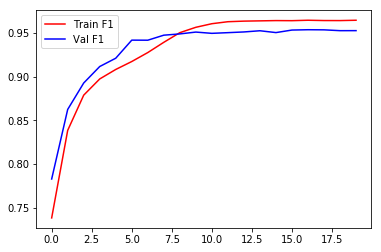

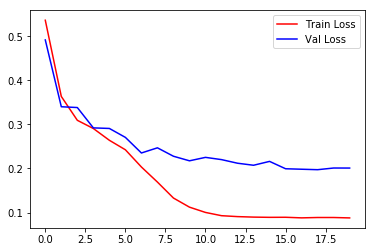

In [0]:
plt.plot(results.history['metric'], 'r')
plt.plot(results.history['val_metric'], 'b')
plt.legend({'Train F1': 'r', 'Val F1':'b'})
plt.show()


plt.plot(results.history['loss'], 'r')
plt.plot(results.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Val Loss':'b'})
plt.show()

# Test Score

In [0]:
filepath = '/content/drive/My Drive/COLAB FILES/Image Forensics/model_seg.hdf5'
model.load_weights(filepath)
test_images=LoadImages(X_test)
y_test_1=LoadImages(y_test)
predicted=model.predict(test_images)

In [16]:
print("Test-Loss: ",model.evaluate(y_test_1,predicted)[0])
print("Test-Score: ",model.evaluate(y_test_1,predicted)[1])

68/68 [==============================] - 5s 67ms/step
Test-Loss:  0.2343798297293046
68/68 [==============================] - 4s 66ms/step
Test-Score:  0.9611374244970434


# Predicting Test Images

In [0]:
filepath = '/content/drive/My Drive/COLAB FILES/Image Forensics/model_seg.hdf5'
model.load_weights(filepath)
test_images=LoadImages(X_test[0:50])
predicted=model.predict(test_images)

In [0]:
def plot_1(image_id):
    fig, ax = plt.subplots(1, 5, figsize=(20, 10))
    ax[0].imshow(imread(X_test[image_id].replace('ELA_Images','images')))
    #ax[0].imshow(imread(test_images[image_id]))
    ax[0].set_title('IMAGE')
    ax[1].imshow(imread(y_test[image_id]))
    ax[1].set_title('Ground Truth');
    ax[2].imshow(predicted[image_id][:,:,0])
    ax[2].set_title('Predicted_0');
    ax[3].imshow(predicted[image_id][:,:,1])
    ax[3].set_title('Predicted_1');
    ax[4].imshow(predicted[image_id][:,:,2])
    ax[4].set_title('Predicted_2');


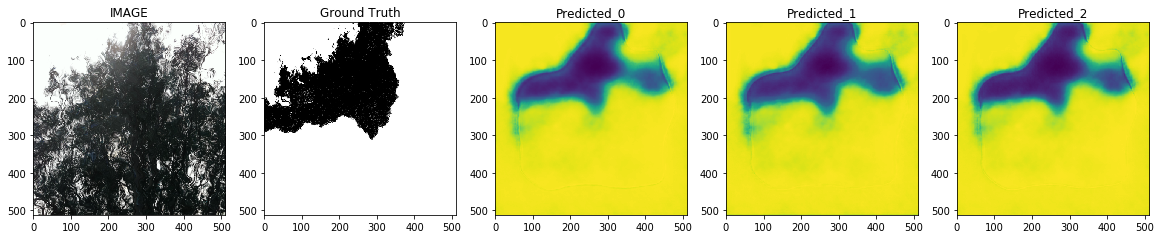

In [0]:
plot_1(2)

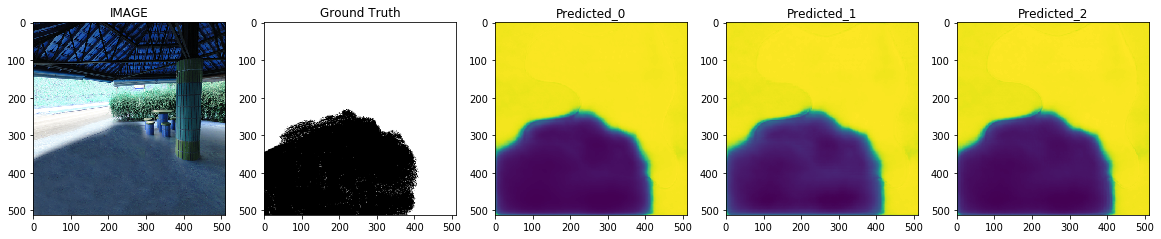

In [0]:
plot_1(13)

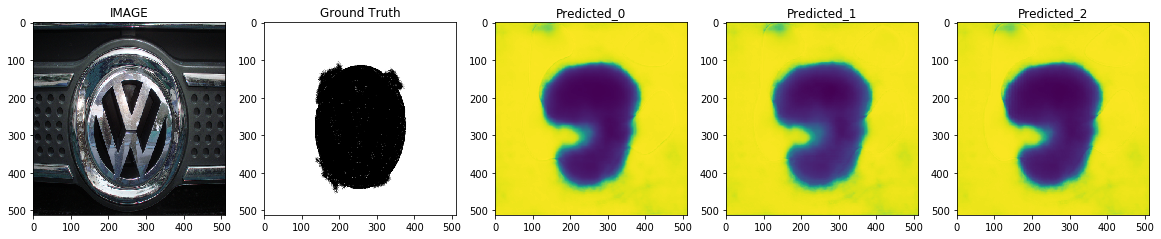

In [0]:
plot_1(38)

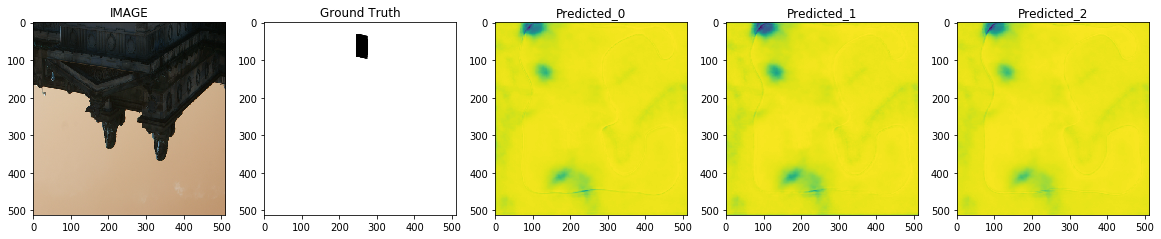

In [0]:
plot_1(39)

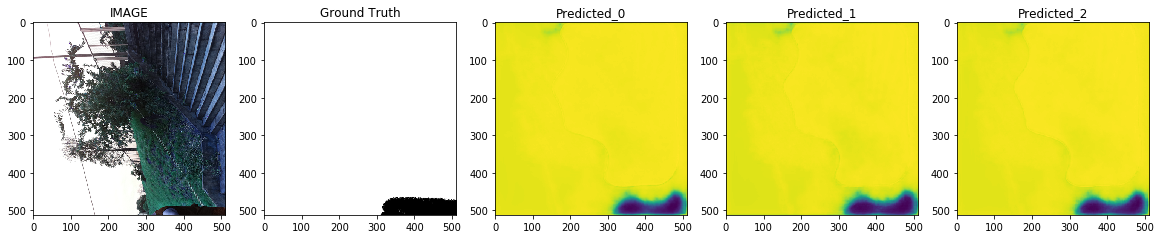

In [0]:
plot_1(7)

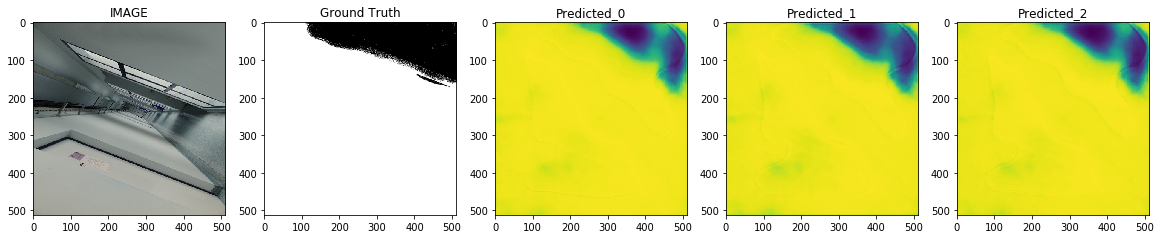

In [0]:
plot_1(42)

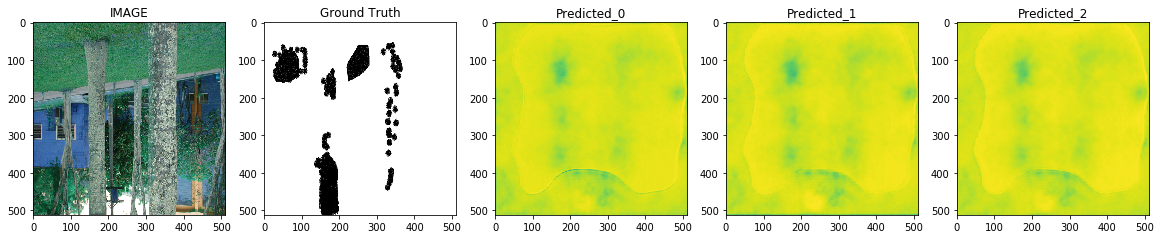

In [0]:
plot_1(33)

In [0]:
def plot_2(image_id):
    fig, ax = plt.subplots(1, 3, figsize=(15, 8))
    ax[0].imshow(imread(X_test[image_id].replace('ELA_Images','images')))
    #ax[0].imshow(imread(X_test[image_id]))
    ax[0].set_title('IMAGE')
    ax[1].imshow(imread(y_test[image_id]))
    ax[1].set_title('Ground Truth');
    ax[2].imshow(predicted[image_id][:,:,1])
    ax[2].set_title('Predicted');

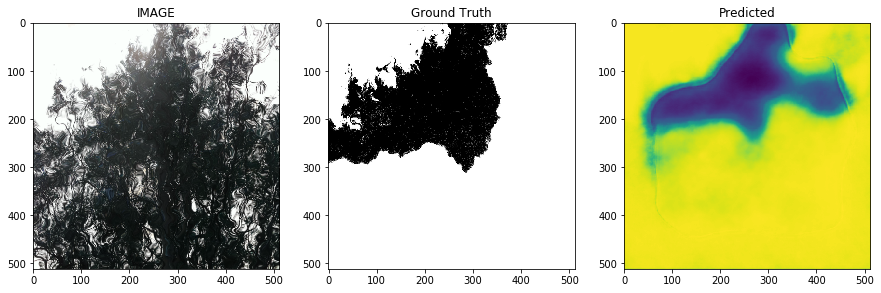

In [0]:
plot_2(2)

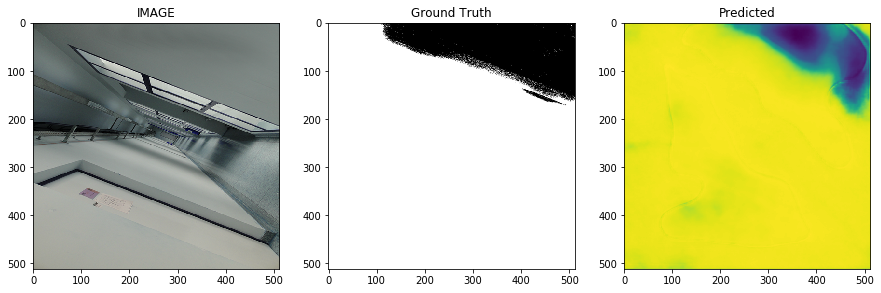

In [0]:
plot_2(42)

#Train Predictions

In [0]:
train_images=LoadImages(X_train[0:50])
predicted_train=model.predict(train_images)

In [0]:
def plot_comparision1(image_id):
    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    ax[0].imshow(imread(X_train[image_id].replace('ELA_Images','images')))
    ax[0].set_title('IMAGE')
    ax[1].imshow(imread(y_train[image_id]))
    ax[1].set_title('Ground Truth');
    ax[2].imshow(predicted_train[image_id])
    ax[2].set_title('Predicted');



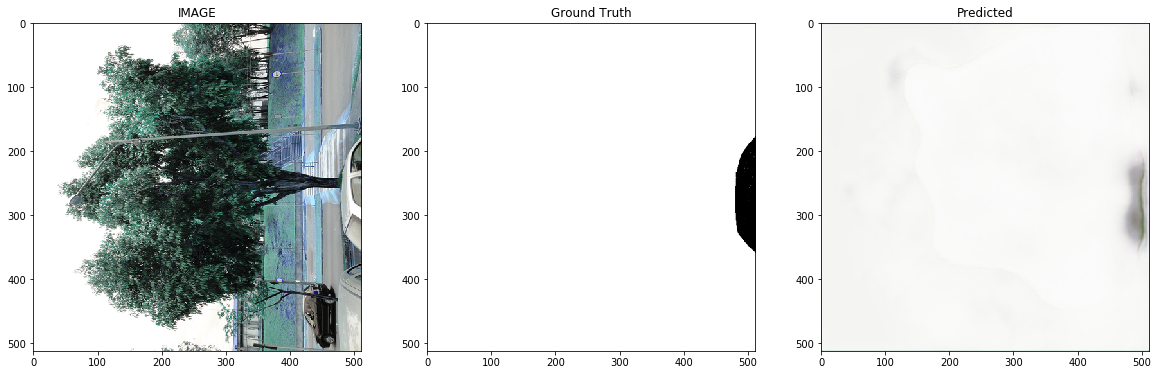

In [0]:
plot_comparision1(5)

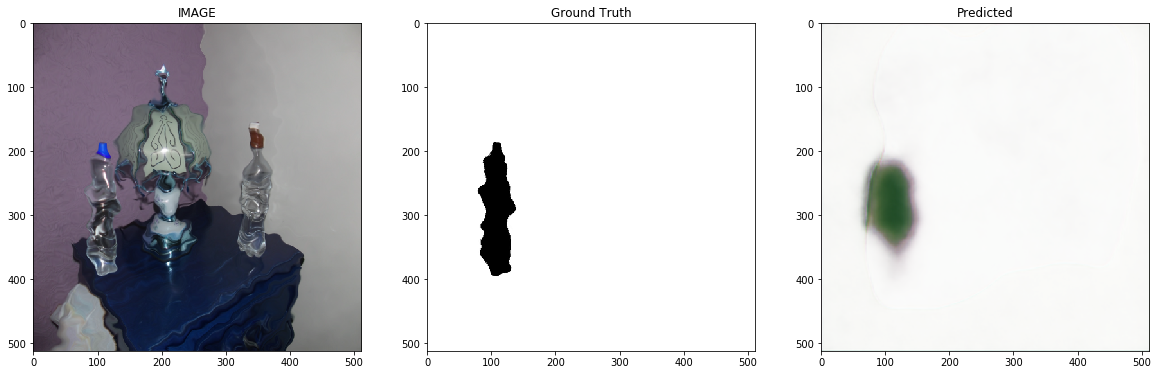

In [0]:
plot_comparision1(45)

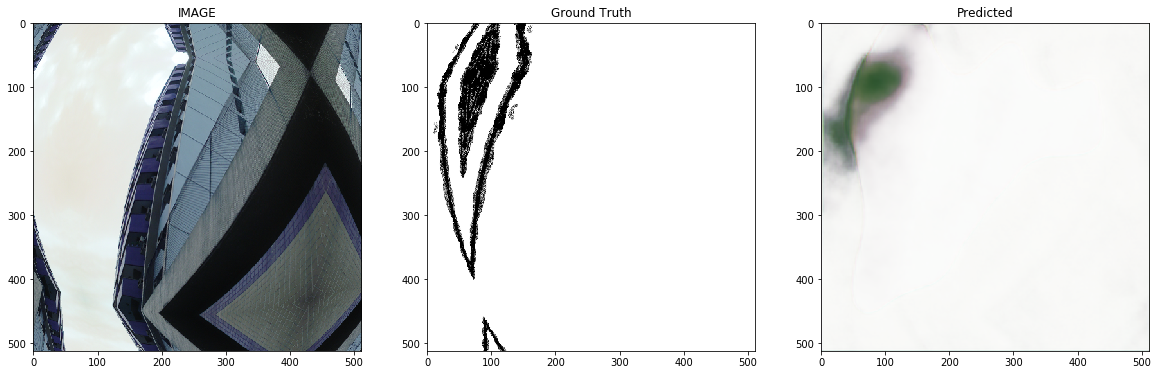

In [0]:
plot_comparision1(26)